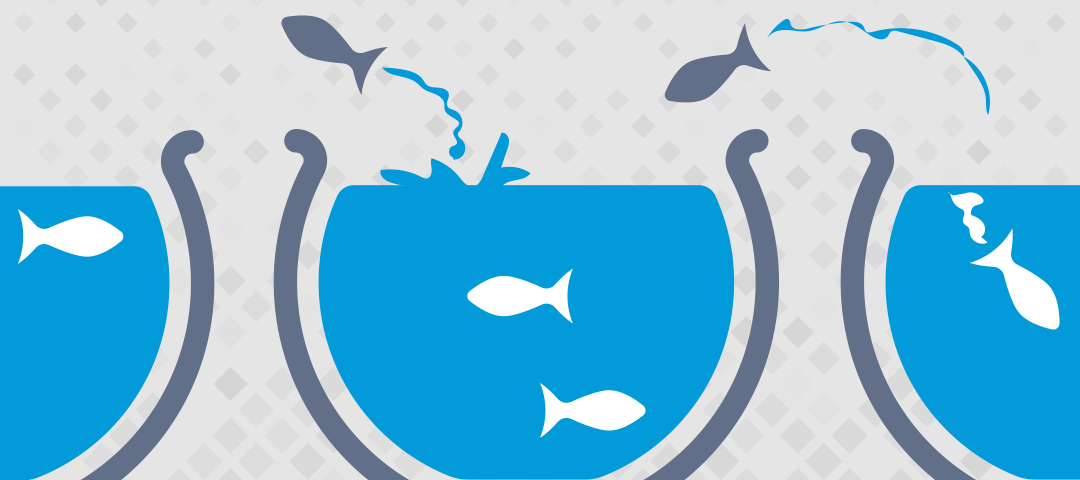 

**<div style="font-size: 26px">Telecom Churn  - EUA </p></div>**

### O objetivo dess estudo é analisar o churn no conjunto de dados com observações de empresas de telecomunicações de estados dos EUA. 

#### O conjunto de dados foi extraído do Kaggle no [link.](https://https://www.kaggle.com/mnassrib/telecom-churn-datasets) 
#### Realizei  a análise exploratória dos dados, buscando entender melhor o perfil dos clientes, área de atuação da empresa, insights nos dados. 
#### Por fim, utilizando modelos de machine learning, estimei quem são os clientes com maior chance de churn nos dados para teste do modelo. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.metrics import confusion_matrix

### 1 - Leitura e analise dos dados.

In [3]:
df_tel = pd.read_csv('churn-bigml-80.csv')
df_tel_test = pd.read_csv('churn-bigml-20.csv')

In [4]:
df_tel.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [5]:
df_tel.tail(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
print('\n Dimensão do df\n', df_tel.shape)
print('\n Valores Unicos\n',df_tel.nunique())
print('\n Quantidade de valores nulos\n',df_tel.isnull().mean())
print('\n Variáveis info:\n', df_tel.info())


 Dimensão do df
 (2666, 20)

 Valores Unicos
 State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

 Quantidade de valores nulos
 State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes  

### 2 - Análise exploratória.

#### As observações presentes no conjunto de dados são de estados dos EUA, concentradas principalmente nos estados abaixo: 
##### 1 - West Virginia;
##### 2 - Minnesota; 
##### 3 - Nova York; 
##### 4 - Virgínia; 
##### 5 - Alabama. 


In [8]:
df_tel['State'].value_counts().head(5)

WV    88
MN    70
NY    68
VA    67
WY    66
Name: State, dtype: int64

In [10]:
def contagem(data,col):
  return data[col].value_counts().sort_values()


def vis(data, col, titulo, xlab):
  plt.figure(figsize = [8,6])
  sns.countplot(data[col],palette='ch:start=.2,rot=-.3',
              order = data[col].value_counts().index,
              edgecolor = 'white')

  plt.title(titulo,fontsize=20)
  plt.xlabel(xlab, fontsize=16)
  plt.ylabel('', fontsize=16)
  plt.show()

In [11]:
contagem(df_tel, 'Area code')

408     669
510     679
415    1318
Name: Area code, dtype: int64

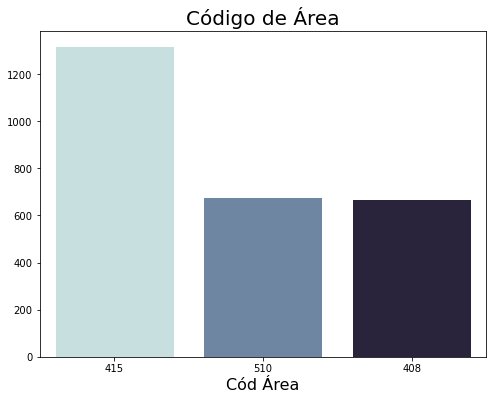

In [12]:
vis(df_tel, 'Area code', 'Código de Área', 'Cód Área')

In [13]:
contagem(df_tel, 'International plan')

Yes     270
No     2396
Name: International plan, dtype: int64

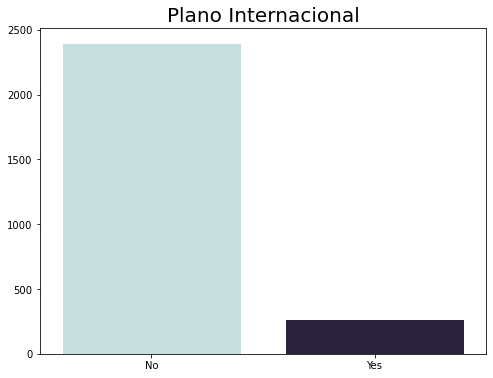

In [14]:
vis(df_tel, 'International plan', 'Plano Internacional', '')

#### Nos dados, 14,55% dos clientes observados se desligou da companhia telefonica.

In [15]:
churn = pd.DataFrame(contagem(df_tel, 'Churn'))
churn['percent'] = round(churn['Churn']/sum(churn['Churn']),4)
churn

,Churn,percent
True,388,0.1455
False,2278,0.8545


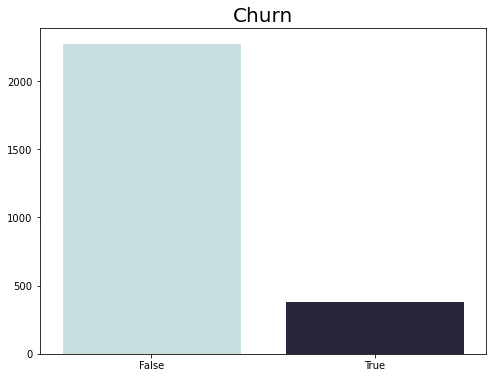

In [16]:
vis(df_tel, 'Churn', 'Churn', '')

In [17]:
df_tel.filter(regex = 'Total').describe()

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
count,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490
std,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000
25%,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000
50%,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000
75%,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000
max,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000


<AxesSubplot:>

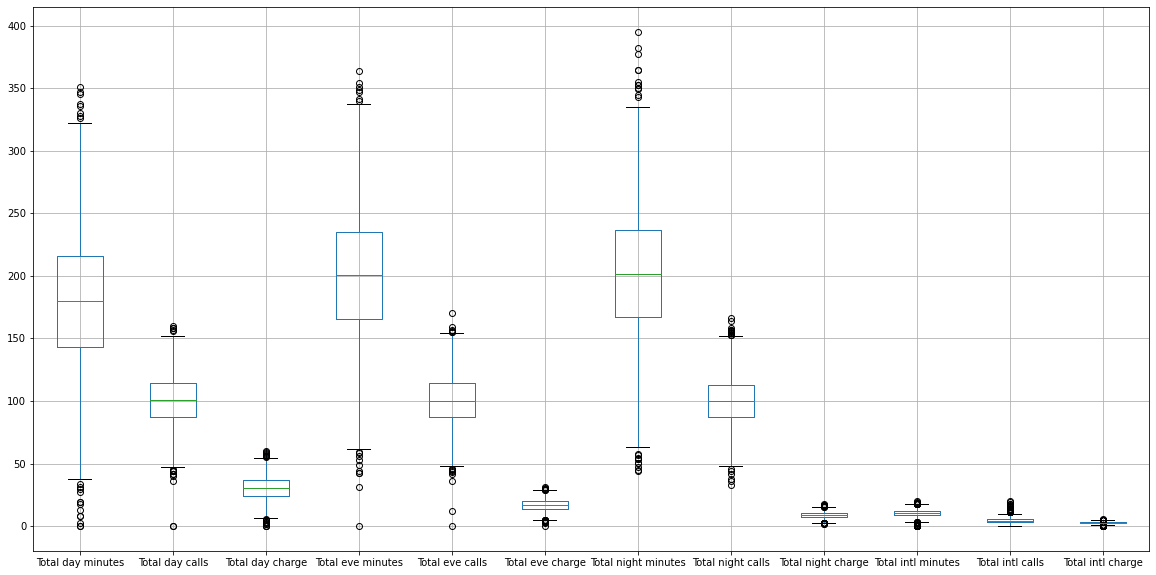

In [20]:
plt.figure(figsize = [20,10])
df_tel.filter(regex = 'Total').boxplot()

### 3 - Limpeza dos dados

In [21]:
df_tel['International plan'].replace(['No','Yes'],[0,1],inplace=True)
df_tel['Voice mail plan'].replace(['No','Yes'],[0,1],inplace=True)

In [22]:
df_tel['International plan'].value_counts()

0    2396
1     270
Name: International plan, dtype: int64

In [23]:
df_tel['Voice mail plan'].value_counts()

0    1933
1     733
Name: Voice mail plan, dtype: int64

<AxesSubplot:>

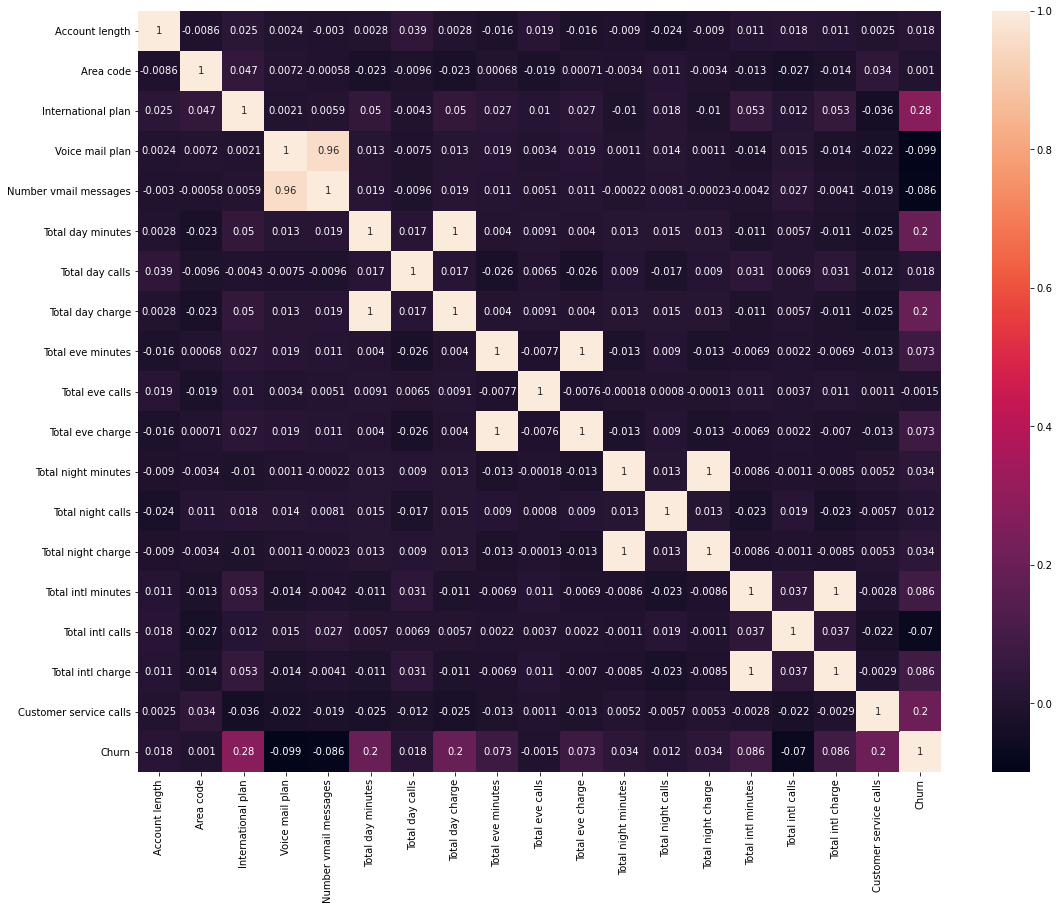

In [24]:
plt.figure(figsize=(18,14))
sns.heatmap(df_tel.corr() , annot =True)

### 4 - Seleção do Modelo e Variáveis

In [25]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
validacao = RepeatedKFold(n_splits = 10)

#### Selecionei para o modelo as variáveis com maior correlação com o Churn ['Customer service calls', 'Total day charge', 'Total day minutes','International plan']

In [26]:
variaveis_explicativas = ['Customer service calls', 'Total day charge', 'Total day minutes','International plan']
X = df_tel[variaveis_explicativas]
y = df_tel['Churn']

### **Modelos testados:**
#### Regressão Logística;
#### Árvore de Decisão;
#### Floresta Aleatória. 

### **Métricas avaliadas:**
#### Acurácia;
#### Precisão. 

In [28]:
lista_de_medidas = ['accuracy', 'precision']
nome_das_medidas = ['acurácia','precisão']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}




for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    vpp = accs_vc['test_precision'].mean()


    resultados0[nome_dos_modelos[i]] = [acc, vpp]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)


### Resultado do modelo na base de treino.  

In [29]:
resultados.sort_values(by = 'acurácia', ascending=False)

,acurácia,precisão
"Random Forest (arvs = 50, prof = 5)",0.882559,0.661823
"Random Forest (arvs = 100, prof = 5)",0.881876,0.654228
Árvore (prof = 3),0.879747,0.710123
Árvore (prof = 5),0.878314,0.640346
"Random Forest (arvs = 100, prof = 7)",0.877267,0.623530
"Random Forest (arvs = 50, prof = 7)",0.876779,0.624946
Árvore (prof = 7),0.873367,0.599815
25-NN,0.867446,0.652909
15-NN,0.863839,0.610861
5-NN,0.861171,0.556731


#### Irei testar a combinação de modelos, em alguns casos essa técnica demonstra uma melhor perfomance.  

In [31]:
from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25) 
arvore = DecisionTreeClassifier(max_depth = 3) 
random =  RandomForestClassifier(n_estimators=100, max_depth = 5)
random2 = RandomForestClassifier(n_estimators=50, max_depth = 5)


modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore), ('RandomFores', random), ('RandomFores2', random2)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
medidas['test_score'].mean()

0.8783913435273577

#### O perfomance da segunda técnica "combinação de modelos" foi inferior ao resultado obtido no modelo Random Forest (arvs = 50, prof = 5) individual.

### 5 - Aplicando o modelo selecionado nos dados de teste 

In [34]:
df_tel_test['International plan'].replace(['No','Yes'],[0,1],inplace=True)
df_tel_test['Voice mail plan'].replace(['No','Yes'],[0,1],inplace=True)

In [35]:
variaveis_explicativas = ['Customer service calls', 'Total day charge', 'Total day minutes','International plan']
Xtest = df_tel_test[variaveis_explicativas]
ytest = df_tel_test['Churn']

In [36]:
modelo_final =  RandomForestClassifier(n_estimators=100, max_depth = 5)
modelo_final.fit(X,y)
modelo_final_pred = modelo_final.predict(Xtest)

In [38]:
confusion_matrix(ytest, modelo_final_pred)

array([[549,  23],
       [ 48,  47]], dtype=int64)

### Optei por utilizar o modelo RandomForest para estimar o comportamento de Churn, pois ele teve a maior acurácia entre os modelos. 
### É importante conhecer o problema de negócio mais a fundo para poder dizer se esse é um modelo bom ou não. 
### Avaliar o custo para companhia de Telecom em campanhas para reter clientes e para atrair novos clientes faz parte desse processo. 
### Para uma melhor performance podemos testar outros modelos, a criação de variáveis e pensar junto a gestão da cia na obtenção de dados que expliquem mais o movimento de Churn. 